# CHAPTER 3 분류
## MNIST
* 미국조사국 직원들이 손으로 쓴 70,000개의 작은 숫자 이미지

In [78]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [79]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [80]:
y.shape

(70000,)

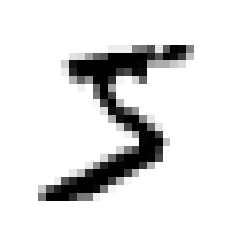

In [190]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
# plt.imshow(some_digit_image)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)    # cmap : 색깔 확인
plt.axis("off")
plt.show()

In [82]:
y[0]

'5'

## 이진 분류기
* 맞냐 틀리냐? 두개로 나눈다.
    - 이진분류를 반복하면 다중분류가 가능해 진다.

* 모델을 선태하여 훈련시킨다.
    - '__확률적 경사하강법__'을 통해 아래 3가지로 변함
        + 퍼셉트론
        + LogisticRegression : 분류 모델
        + SVM(support vector machine, 서포트 벡터 머신) : 경계로 나눔
* 확률적 경사하강법
    - 학습데이터의 단위를 배치라 하고, 배치 사이즈가 1인 분류기
    - 한번에 하나씩 훈련샘플을 처리해서 학습

```
from sklearn.linear_model import SGDClassifier

SGDClassifier(loss='perceptron')
SGDClassifier(loss='log')
SGDClassifier(loss='hinge')  # 기본값 SVM
```
* SGD : Stochastic(확률적) Gradient(기울기) Descent(하강)

In [83]:
# 문자열 레이블 -> 정수형으로 바꿈
y = y.astype(np.int8)
#X = X.astype(np.int8)

In [84]:
# 테스트 셋과 훈련 셋 분리
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [85]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [195]:
print(y_train_5)
print(y_test_5)

[ True False False ...  True False False]
[False False False ... False  True False]


In [137]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)  # 일반적으로는 랜덤성을 가짐
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [138]:
sgd_clf.predict([some_digit])

array([ True])

In [139]:
sgd_clf.predict(X[1].reshape(1,-1))

array([False])

In [196]:
sgd_clf.predict(X[[1]])

array([False])

In [197]:
X[1].reshape(1,-1).shape
# X[[1]].shape

(1, 784)

In [141]:
X[[1]].shape

(1, 784)

In [142]:
y[1]

0

In [143]:
some_digit.shape

(784,)

# Set
* Test(수능) vs Training(사설모의고사) vs Validation(평가원 모의고사)
    - 모델을 검증하는 과정에서 Test Set을 사용한다. Test Set = Validation
    - 문제점
        + Test Set을 이용해 모델의 성능을 확인하고 -> 파라미터 수정 -> Test에서만 잘 동작하는 모델이 생성된다.
        + Trainnig -> Validation 보정 -> Test으로 평가
        + Test(1) : Training(8) : Validation(1)
  
* Validation Set을 사용했을 때 장점
    - 과적합 문제를 해결할 수 있다.

* 검증세트를 통해 모델 선정 과정
    1. Trainig Set으로 Model 학습
    2. 학습된 모델을 Validation Set으로 평가
    3. Validation Set에 대한 결과로 모델 파라미터 조작
    4. 가장 우수한 모델 선택
    5. 그 모델로 Test Set 평가

### 교차 검즘
* 모델간의 검사?
* 단순교차 검증
    - 예) k=3인 경우
    - trainig 데이터를 3구간으로 나누고, 3구간으로 또 나눔(9개 구간)
    - 그리고 3구간은 Validation Set으로 사용하고, 6구간은 training
    ```
    from sklearn.model_selection import cross_val_score
    cross_val_score(모델객체, 훈련데이터, 타겟, cv=폴드수)
    ```
* 계층별 K-겹 교차검증
    - 편향된 데이터의 경우 단순교차 검즘으로는 문제가 발생할 수 있다.
    - 계층을 나누고 분할해서 뽑는다.(자동)
    ```
    from sklearn.model_selection import StratifiedKFold
    skf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
    cross_val_score(sgd_clf, X_train, y_train_5, cv=skf)
    ```   
* 임의분할 교차검증
    - Train_size와 test_size를 데이터 개수(정수) 또는 비율(실수)로 정할 수 있다.
    - 4번 반복 분할 25%가 검증세트가 된다.
    - 10%를 검증세트로 4번 반복분할하여 학습시킬 수 있다.
    ```
    from sklearn.model_selection import ShuffleSplit
    ss = ShuffleSplit(n_splits=8, random_state=42, test_size=0.5, train_size=0.5)
    cross_val_score(sgd_clf, X_train, y_train_5, cv=ss)
    ```
* 나오는 값은 '정확도'를 의미   
 

In [109]:
# 단순교차 검증
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [124]:
# 계층별 K-겹 교차검증
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
cross_val_score(sgd_clf, X_train, y_train_5, cv=skf)

array([0.95983333, 0.962     , 0.94216667, 0.96733333, 0.95416667])

In [125]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
cross_val_score(sgd_clf, X_train, y_train_5, cv=skf, scoring="accuracy")

array([0.95983333, 0.962     , 0.94216667, 0.96733333, 0.95416667])

In [123]:
# 임의분할 교차검증
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=8, random_state=42, test_size=0.5, train_size=0.5)
cross_val_score(sgd_clf, X_train, y_train_5, cv=ss)

array([0.94863333, 0.96333333, 0.96603333, 0.9625    , 0.96266667,
       0.9621    , 0.96513333, 0.96696667])

In [198]:
# 더미 분류기?
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [199]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

## 오차 행렬(Confusion Matrix)
```
from sklearn.metrics import confusion_matrix
```
* 행 : 실제 Class(target)
* 열 : 예측 Class(predict)
* TP(True Positive), FP(False Positive), FN(False Negative), TN(True Negative)

* 정밀도(Precision)
    - 모델이 True라고 예측한 것 중에서 실제 True인 것에 대한 비율
    - TP(True Positive) / TP + FP(False Positive)
    - 예) 맑다고 예측했는데 실제 맑은날 비율

* 재현율(Recall) or 민감도 or 진짜 양성 비율(TPR) 
    - 실제 T 모델이 T라고 예측하것의 비율
    - TP / TP + FN(False Negative)
    - 예) 실제 맑은날 중에 맑다고 예측한 비율
    
* 두 얼굴 중 한 사람 얼굴 찾음
    - Precision: 100%
    - Recall: 50%
    
* 정밀도 VS 재현율
    - 실제 Positive인 데이터를 Negative로 잘못 판단하면 안되는 경우 '__재현율__'을 사용
        - 인증, 악성코드, 병진단
        - 실제로 양성인데 음성으로 판단하면 -> 병을 키울수 있다.
    - 실제로 Negative인데 Positive로 잘못 판단하면 안되는 경우 '__정밀도__'를 사용
        - 스팸메일
        - 스팸메일이 아닌데 스펨메일로 판단하면 -> 중요 메일을 못받음
        
* 정밀도는 낮아지고 재현율이 높다 -> 예측을 많이 함(골결이 낮다. 호난사)
* 정밀도가 높아지고 재현율이 낮다 -> 신중하게 예측을 함. (찬스는 낮지만, 골결이 높다. 손날두)

* confidence Threshold 값에 따라 정밀도와 재현율의 수치가 조정되고(서로 상보적), trad-off가 발생한다.
    - trad-off : 한쪽이 올라가면 다른쪽이 내려가는 모순적 관계를 이르는 말


In [200]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
# cross_val_score() : 평가 점수를 반환
# cross_val_predict() : 각 테스트 폴드에서 얻은 예측을 반환
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [130]:
# 오차 행렬 사용
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)
# [ TN, FP, FN, TP ]

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [132]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # 정밀도
# 5로 예측한 값중 83%만 정확함

0.8370879772350012

In [134]:
recall_score(y_train_5, y_train_pred)  # 재현율
# 전체(실제) 5에서 65%만 감지함

0.6511713705958311

In [135]:
# F점수 사용, 정밀도와 재련율의 조화 평균
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

### 정밀도/재현율 트레이드오프

In [181]:
# decision_function: 샘플에 대한 신뢰도 점수를 예측하는 결정 함수
# 임계값을 설정해 점수가 임계값보다 크면 양성 클래스 작으면 음성 클래스에 할당함
y_scores = sgd_clf.decision_function([some_digit])  
y_scores

array([2164.22030239])

In [201]:
threshold = 0  # 임계값
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [147]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [202]:
# 예측 결과가 아니라 '결정 점수'를 반환하게 함
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [165]:
# 정밀도, 재현율, 임계값 반환
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

## 면적이 넓을 수로 좋음!!

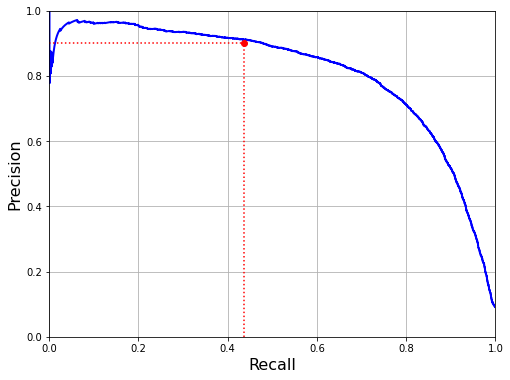

In [203]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.4368, 0.4368], [0., 0.9], "r:")
plt.plot([0.0, 0.4368], [0.9, 0.9], "r:")
plt.plot([0.4368], [0.9], "ro")
plt.show()

In [164]:
thresholds # precisions

array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
         38871.26391927,   42216.05562787,   49441.43765905])

In [158]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
# argmax: 축(axis)을 따라 최대값의 인덱스를 반환
threshold_90_precision

3370.0194991439557

In [204]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [161]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [162]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

### ROC곡선
* 수신기 조작 특성(Receiver Operating Characteristic, ROC)
* 거짓 양성 비율(false positive rate, FPR)에 대한 진짜 양성 비율(True Positive rate, TPR)의 곡선

In [166]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
# tpr : 재현율(recall) 또는 진짜 양성(TP)
# fpr : 거짓 양성(false negative)

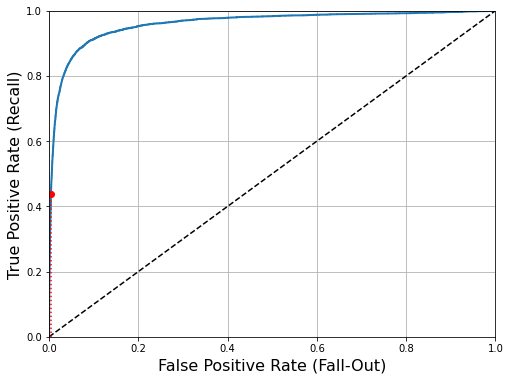

In [167]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal, 대각 점선
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                         # Not shown
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:") # Not shown
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")  # Not shown
plt.plot([4.837e-3], [0.4368], "ro")               # Not shown
plt.show()

In [168]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)
# AUC(Area Under the Curve) : 곡선 아래의 면적

0.9604938554008616

In [170]:
# RandomForestClassifier를 훈련시켜 ROC 곡선과 ROC AUC 점수를 비교
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifiersifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [173]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [171]:
y_scores_forest = y_probas_forest[:, 1] # 점수 = 양성 클래스의 확률
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

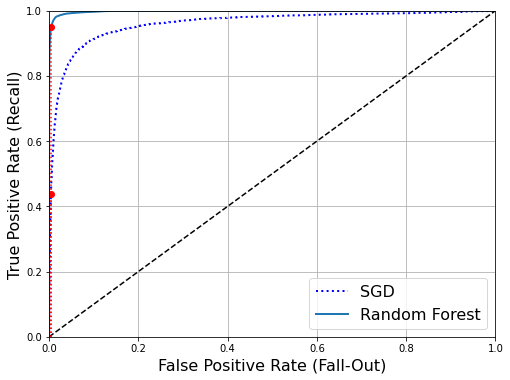

In [172]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.4368], "r:")
plt.plot([0.0, 4.837e-3], [0.4368, 0.4368], "r:")
plt.plot([4.837e-3], [0.4368], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.9487], "r:")
plt.plot([4.837e-3], [0.9487], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [175]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [176]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9905083315756169

In [177]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

## 다중 분류